##### Python Fundamentals

In [ ]:
print(type(2.7))

In [7]:
# list : list 내 자료형은 서로 달라도 된다.
a = [1, 2, 4, 5]
print(len(a))
print(a)

# slicing
print(a[0:2])
print(a[1:])
print(a[:-1]) # 처음부터 마지막 원소의 1개 앞까지.

4
[1, 2, 4, 5]
[1, 2]
[2, 4, 5]
[1, 2, 4]


In [9]:
# dictionary : KV pair 저장
a = {'height':180, 'weight':70}

print(a['weight'])

70


In [11]:
# class : 독자적 자료형

class WooHyeon:
    def __init__(self, a, b): # 생성자 : 클래스 인스턴스가 만들어질 때 한 번 호출되는 초기화 코드.
        self.a = a
        self.b = b
    
    def add(self):
        print(self.a + self.b)

a = WooHyeon(3, 4)
a.add()

7


##### NumPy Fundamentals

In [ ]:
import numpy as np

# 배열
x = np.array([[1, 2, 3], [1, 2, 3]]) # 사칙연산은 element-wise.
y = np.array([1, 2, 3])
# 스칼라 값 혹은 크기가 다른 배열과의 연산은 분배법칙으로 braodcast.

print(x*2)
print(x*y)
print(x[0, 1])
print(x.shape)
print(x.dtype)

[[2 4 6]
 [2 4 6]]
[[1 4 9]
 [1 4 9]]
2
(2, 3)
int32


In [18]:
x.flatten() # 다차원 배열을 1차원 배열로.
print(x)
print(np.array([0,1,2])) # 0, 1, 2번째 원소 얻기
print(x[x>14]) # 14보다 큰 원소만 얻기

[[1 2 3]
 [1 2 3]]
[0 1 2]
[]


##### mpl Fundamentals

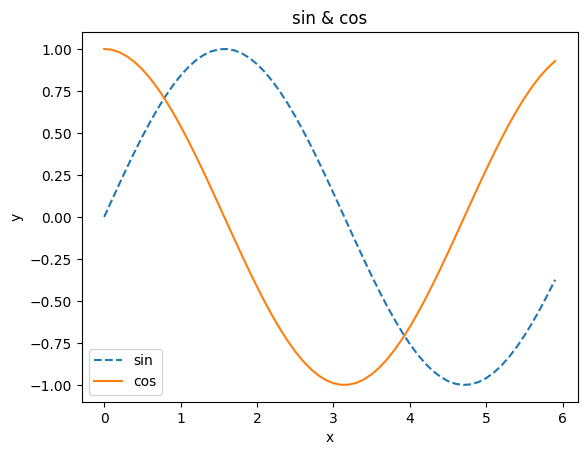

In [20]:
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1) # 0에서 6까지 0.1 간격으로 생성
y = np.sin(x)
yy = np.cos(x)

plt.plot(x, y, linestyle = "--", label = 'sin')
plt.plot(x, yy, label = 'cos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()

In [ ]:
from matplotlib.image import imread

img = imread('디랙토리')
plt.imshow(img)

#### PyTorch Fundamentals

In [1]:
import torch

x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # rank 2 tensor

print(x.shape) 
print(x.size()) # tensor 크기 출력
print(x.ndimension()) # rank 출력

c:\Users\xelle\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


torch.Size([3, 3])
torch.Size([3, 3])
2


In [2]:
x = torch.unsqueeze(x, 0) # [3, 3]의 0번째 자리 부분에 1차원 추가 -> [1, 3, 3]. rank를 키움

print(x)
print(x.shape)
print(x.ndimension())

x = torch.squeeze(x) # 크기가 1인 rank 삭제 -> [3, 3]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3])
3


In [3]:
x = x.view(1, 9) # 3*3을 1*9로 펼침
x = torch.squeeze(x)
print(x)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [4]:
w = torch.randn(5, 3, dtype = torch.float) # 정규분포에서 샘플링한 5*3 텐서
x = torch.randn(3, 1, dtype = torch.float)
y = torch.tensor([[1, 2, 3, 4, 5]])

wx = torch.mm(w, x) + y.view(5, 1) # 텐서곱 + elementwise sum
print(wx)

# PyTorch는 서로 다른 크기의 텐서를 더할 때 broadcasting이 적용된다. 
# e.g. 5 by 1 tensor + 1 by 5 tensor의 경우 5 by 5 tensor로 확장된 후 더해진다. view()로 크기를 잘 조정하여 broadcasting을 피하자.

tensor([[0.8450],
        [3.3584],
        [4.5059],
        [3.8051],
        [7.1684]])


In [5]:
w = torch.tensor(1, requires_grad=True, dtype = torch.float32) # 값이 1인 스칼라 텐서, requires_grad=True면 autograd 기능으로 미분값이 w.grad에 저장됨.

a = w**3+w**2
a.backward() # a를 w로 미분

print(w.grad)

tensor(5.)


In [ ]:
class NNModel(tf.keras.Model):
    def __init__(self, rate=0.1):
        super(NNModel, self).__init__()
        self.flat = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(30)
        self.final_layer = tf.keras.layers.Dense(10, activation = 'softmax')
        
    def call(self, inp):
        output = self.flat(inp)
        output = self.dense(output)
        final_output = self.final_layer(output)
        return final_output

model = NNModel()

